# Live Coding 1

## 1. Contexto del dataset

Trabajaremos con un archivo de atenciones de urgencia respiratoria en la Región Metropolitana, que incluye:
- establecimientos de salud,
- variables territoriales,
- causas clínicas,
- conteos por tramo etario,
- información temporal (año / semana).

Este tipo de datos **no viene listo para análisis**: mezcla variables clínicas, administrativas y operativas.

## 2. Cargar datos

In [ ]:
import pandas as pd
path = "data/data_stgo_10k.csv" 
df = pd.read_csv(path)
df.shape

(10000, 26)

## 3. Inspección inicial

Antes de tocar los datos, hay que mirarlos: estructura, primeras filas y tipos.

In [16]:
df.head()

Unnamed: 0  EstablecimientoCodigo  \
0      601725                 110100   
1     1744822                 110100   
2      401783                 110100   
3      827510                 111800   
4     2768546                 110110   

                             EstablecimientoGlosa  RegionCodigo  \
0  Hospital San Juan de Dios (Santiago, Santiago)            13   
1  Hospital San Juan de Dios (Santiago, Santiago)            13   
2  Hospital San Juan de Dios (Santiago, Santiago)            13   
3                            SAPU Consultorio Nº1            13   
4    Instituto Traumatológico Dr. Teodoro Gebauer            13   

                        RegionGlosa  ComunaCodigo ComunaGlosa  \
0  Región Metropolitana de Santiago         13101    Santiago   
1  Región Metropolitana de Santiago         13101    Santiago   
2  Región Metropolitana de Santiago         13101    Santiago   
3  Región Metropolitana de Santiago         13101    Santiago   
4  Región Metropolitana de Santiago         13101    Santiago   

   ServicioSaludCodigo                         ServicioSaludGlosa  \
0                   10  Servicio de Salud Metropolitano Occidente   
1                   10  Servicio de Salud Metropolitano Occidente   
2                   10  Servicio de Salud Metropolitano Occidente   
3                   11    Servicio de Salud Metropolitano Central   
4                   10  Servicio de Salud Metropolitano Occidente   

                                TipoEstablecimiento  ...  Anio  \
0                                          Hospital  ...  2024   
1                                          Hospital  ...  2025   
2                                          Hospital  ...  2020   
3  Servicio de Atención Primaria de Urgencia (SAPU)  ...  2017   
4                                          Hospital  ...  2024   

  SemanaEstadistica OrdenCausa  \
0                34         34   
1                37         34   
2                36          5   
3                18          6   
4                 2         10   

                                               Causa  NumTotal NumMenor1Anio  \
0  HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...       0.0           0.0   
1  HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...       0.0           0.0   
2                                Influenza (J09-J11)       0.0           0.0   
3                                 Neumonía (J12-J18)      10.0           0.0   
4              Covid-19, Virus no identificado U07.2       0.0           0.0   

   Num1a4Anios  Num5a14Anios  Num15a64Anios Num65oMas  
0          0.0           0.0            0.0       0.0  
1          0.0           0.0            0.0       0.0  
2          0.0           0.0            0.0       0.0  
3          0.0           0.0            2.0       8.0  
4          0.0           0.0            0.0       0.0  

[5 rows x 26 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10000 non-null  int64  
 1   EstablecimientoCodigo      10000 non-null  int64  
 2   EstablecimientoGlosa       10000 non-null  object 
 3   RegionCodigo               10000 non-null  int64  
 4   RegionGlosa                10000 non-null  object 
 5   ComunaCodigo               10000 non-null  int64  
 6   ComunaGlosa                10000 non-null  object 
 7   ServicioSaludCodigo        10000 non-null  int64  
 8   ServicioSaludGlosa         10000 non-null  object 
 9   TipoEstablecimiento        10000 non-null  object 
 10  DependenciaAdministrativa  10000 non-null  object 
 11  NivelAtencion              10000 non-null  object 
 12  TipoUrgencia               10000 non-null  object 
 13  Latitud                    10000 non-null  floa

In [19]:
df.columns

Index(['Unnamed: 0', 'EstablecimientoCodigo', 'EstablecimientoGlosa',
       'RegionCodigo', 'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa',
       'ServicioSaludCodigo', 'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'Latitud',
       'Longitud', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas'],
      dtype='object')

In [ ]:
df["SemanaEstadistica"].unique()

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Tipos de datos
df.dtypes

Unnamed: 0                     int64
EstablecimientoCodigo          int64
EstablecimientoGlosa          object
RegionCodigo                   int64
RegionGlosa                   object
ComunaCodigo                   int64
ComunaGlosa                   object
ServicioSaludCodigo            int64
ServicioSaludGlosa            object
TipoEstablecimiento           object
DependenciaAdministrativa     object
NivelAtencion                 object
TipoUrgencia                  object
Latitud                      float64
Longitud                     float64
NivelComplejidad              object
Anio                           int64
SemanaEstadistica              int64
OrdenCausa                     int64
Causa                         object
NumTotal                     float64
NumMenor1Anio                float64
Num1a4Anios                  float64
Num5a14Anios                 float64
Num15a64Anios                float64
Num65oMas                    float64
dtype: object

In [22]:
df["RegionGlosa"].unique()

array(['Región Metropolitana de Santiago'], dtype=object)

In [23]:
df["ComunaGlosa"].unique()

array(['Santiago'], dtype=object)

In [24]:
df["Anio"].unique()

array([2024, 2025, 2020, 2017, 2018, 2015, 2019, 2016, 2022, 2021, 2014,
       2023])

In [25]:
df["NivelAtencion"].unique()

array(['Terciario', 'Primario'], dtype=object)

In [26]:
df["NivelComplejidad"].unique()

array(['Alta Complejidad', 'Baja Complejidad'], dtype=object)

In [27]:
df["Causa"].unique()

array(['HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1',
       'Influenza (J09-J11)', 'Neumonía (J12-J18)',
       'Covid-19, Virus no identificado U07.2',
       'Crisis obstructiva bronquial (J40-J46)',
       'HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO',
       'TOTAL CAUSAS SISTEMA RESPIRATORIO', 'IRA Alta (J00-J06)',
       'Otra causa respiratoria (J22, J30-J39, J47, J60-J98)',
       'Bronquitis/bronquiolitis aguda (J20-J21)',
       'Covid-19, Virus identificado U07.1',
       'HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2'],
      dtype=object)

In [28]:
df["TipoUrgencia"].unique()

array(['Urgencia Hospitalaria (UEH)', 'Urgencia Ambulatoria (SAPU)',
       'Urgencia Especializada'], dtype=object)

In [29]:
df["TipoEstablecimiento"].unique()

array(['Hospital', 'Servicio de Atención Primaria de Urgencia (SAPU)'],
      dtype=object)

## 4. Limpieza estructural básica

### 4.1 Eliminar columnas irrelevantes

`Unnamed: 0` suele ser un índice antiguo guardado al exportar a CSV.  
No es parte del fenómeno que estamos estudiando.

In [30]:
df.head()

Unnamed: 0  EstablecimientoCodigo  \
0      601725                 110100   
1     1744822                 110100   
2      401783                 110100   
3      827510                 111800   
4     2768546                 110110   

                             EstablecimientoGlosa  RegionCodigo  \
0  Hospital San Juan de Dios (Santiago, Santiago)            13   
1  Hospital San Juan de Dios (Santiago, Santiago)            13   
2  Hospital San Juan de Dios (Santiago, Santiago)            13   
3                            SAPU Consultorio Nº1            13   
4    Instituto Traumatológico Dr. Teodoro Gebauer            13   

                        RegionGlosa  ComunaCodigo ComunaGlosa  \
0  Región Metropolitana de Santiago         13101    Santiago   
1  Región Metropolitana de Santiago         13101    Santiago   
2  Región Metropolitana de Santiago         13101    Santiago   
3  Región Metropolitana de Santiago         13101    Santiago   
4  Región Metropolitana de Santiago         13101    Santiago   

   ServicioSaludCodigo                         ServicioSaludGlosa  \
0                   10  Servicio de Salud Metropolitano Occidente   
1                   10  Servicio de Salud Metropolitano Occidente   
2                   10  Servicio de Salud Metropolitano Occidente   
3                   11    Servicio de Salud Metropolitano Central   
4                   10  Servicio de Salud Metropolitano Occidente   

                                TipoEstablecimiento  ...  Anio  \
0                                          Hospital  ...  2024   
1                                          Hospital  ...  2025   
2                                          Hospital  ...  2020   
3  Servicio de Atención Primaria de Urgencia (SAPU)  ...  2017   
4                                          Hospital  ...  2024   

  SemanaEstadistica OrdenCausa  \
0                34         34   
1                37         34   
2                36          5   
3                18          6   
4                 2         10   

                                               Causa  NumTotal NumMenor1Anio  \
0  HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...       0.0           0.0   
1  HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...       0.0           0.0   
2                                Influenza (J09-J11)       0.0           0.0   
3                                 Neumonía (J12-J18)      10.0           0.0   
4              Covid-19, Virus no identificado U07.2       0.0           0.0   

   Num1a4Anios  Num5a14Anios  Num15a64Anios Num65oMas  
0          0.0           0.0            0.0       0.0  
1          0.0           0.0            0.0       0.0  
2          0.0           0.0            0.0       0.0  
3          0.0           0.0            2.0       8.0  
4          0.0           0.0            0.0       0.0  

[5 rows x 26 columns]

In [31]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

df.shape

(10000, 25)

## 5. Conversión y revisión de tipos de datos

La idea es que las columnas se comporten como lo que son (número, texto, categoría).  
Los conteos deberían ser numéricos y aceptar nulos.

In [32]:
df.dtypes

EstablecimientoCodigo          int64
EstablecimientoGlosa          object
RegionCodigo                   int64
RegionGlosa                   object
ComunaCodigo                   int64
ComunaGlosa                   object
ServicioSaludCodigo            int64
ServicioSaludGlosa            object
TipoEstablecimiento           object
DependenciaAdministrativa     object
NivelAtencion                 object
TipoUrgencia                  object
Latitud                      float64
Longitud                     float64
NivelComplejidad              object
Anio                           int64
SemanaEstadistica              int64
OrdenCausa                     int64
Causa                         object
NumTotal                     float64
NumMenor1Anio                float64
Num1a4Anios                  float64
Num5a14Anios                 float64
Num15a64Anios                float64
Num65oMas                    float64
dtype: object

### 5.1 Conteos numéricos (nullable)

Usamos `Int64` (con I mayúscula) porque permite valores faltantes (`NA`).

In [10]:
conteo_cols = [
    "NumTotal","NumMenor1Anio","Num1a4Anios",
    "Num5a14Anios","Num15a64Anios","Num65oMas"
]

# Convertir a Int64 si es posible
for c in conteo_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").astype("Int64")

df[conteo_cols].dtypes

NumTotal         Int64
NumMenor1Anio    Int64
Num1a4Anios      Int64
Num5a14Anios     Int64
Num15a64Anios    Int64
Num65oMas        Int64
dtype: object

## 6. Estandarización de categorías

La estandarización no busca “borrar” el original, sino crear una versión **comparable** para análisis.

In [33]:
df.columns

Index(['EstablecimientoCodigo', 'EstablecimientoGlosa', 'RegionCodigo',
       'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa', 'ServicioSaludCodigo',
       'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'Latitud',
       'Longitud', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas'],
      dtype='object')

### 6.1 Tipo de urgencia

In [34]:
df["TipoUrgencia"].value_counts()

TipoUrgencia
Urgencia Hospitalaria (UEH)    5410
Urgencia Ambulatoria (SAPU)    3366
Urgencia Especializada         1224
Name: count, dtype: int64

In [35]:
# Conserva el original y crea una versión categórica
urg_map = {
    "URGENCIA HOSPITALARIA (UEH)": "HOSPITALARIA",
    "URGENCIA AMBULATORIA (SAPU)": "AMBULATORIA",
    "URGENCIA ESPECIALIZADA": "ESPECIALIZADA",
}

df["TipoUrgencia_cat"] = (
    df["TipoUrgencia"].astype("string").str.upper().str.strip().map(urg_map)
)

df[["TipoUrgencia", "TipoUrgencia_cat"]].drop_duplicates()

TipoUrgencia TipoUrgencia_cat
0  Urgencia Hospitalaria (UEH)     HOSPITALARIA
3  Urgencia Ambulatoria (SAPU)      AMBULATORIA
4       Urgencia Especializada    ESPECIALIZADA

In [36]:
df.head()

EstablecimientoCodigo                            EstablecimientoGlosa  \
0                 110100  Hospital San Juan de Dios (Santiago, Santiago)   
1                 110100  Hospital San Juan de Dios (Santiago, Santiago)   
2                 110100  Hospital San Juan de Dios (Santiago, Santiago)   
3                 111800                            SAPU Consultorio Nº1   
4                 110110    Instituto Traumatológico Dr. Teodoro Gebauer   

   RegionCodigo                       RegionGlosa  ComunaCodigo ComunaGlosa  \
0            13  Región Metropolitana de Santiago         13101    Santiago   
1            13  Región Metropolitana de Santiago         13101    Santiago   
2            13  Región Metropolitana de Santiago         13101    Santiago   
3            13  Región Metropolitana de Santiago         13101    Santiago   
4            13  Región Metropolitana de Santiago         13101    Santiago   

   ServicioSaludCodigo                         ServicioSaludGlosa  \
0                   10  Servicio de Salud Metropolitano Occidente   
1                   10  Servicio de Salud Metropolitano Occidente   
2                   10  Servicio de Salud Metropolitano Occidente   
3                   11    Servicio de Salud Metropolitano Central   
4                   10  Servicio de Salud Metropolitano Occidente   

                                TipoEstablecimiento DependenciaAdministrativa  \
0                                          Hospital         Servicio de Salud   
1                                          Hospital         Servicio de Salud   
2                                          Hospital         Servicio de Salud   
3  Servicio de Atención Primaria de Urgencia (SAPU)         Servicio de Salud   
4                                          Hospital         Servicio de Salud   

   ... SemanaEstadistica OrdenCausa  \
0  ...                34         34   
1  ...                37         34   
2  ...                36          5   
3  ...                18          6   
4  ...                 2         10   

                                               Causa  NumTotal NumMenor1Anio  \
0  HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...       0.0           0.0   
1  HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...       0.0           0.0   
2                                Influenza (J09-J11)       0.0           0.0   
3                                 Neumonía (J12-J18)      10.0           0.0   
4              Covid-19, Virus no identificado U07.2       0.0           0.0   

   Num1a4Anios  Num5a14Anios  Num15a64Anios Num65oMas  TipoUrgencia_cat  
0          0.0           0.0            0.0       0.0      HOSPITALARIA  
1          0.0           0.0            0.0       0.0      HOSPITALARIA  
2          0.0           0.0            0.0       0.0      HOSPITALARIA  
3          0.0           0.0            2.0       8.0       AMBULATORIA  
4          0.0           0.0            0.0       0.0     ESPECIALIZADA  

[5 rows x 26 columns]

### 6.2 Tipo de establecimiento

In [37]:
df["TipoEstablecimiento"].unique()

array(['Hospital', 'Servicio de Atención Primaria de Urgencia (SAPU)'],
      dtype=object)

In [38]:
estab_map = {
    "HOSPITAL": "HOSPITAL",
    "SERVICIO DE ATENCIÓN PRIMARIA DE URGENCIA (SAPU)": "SAPU",
}

df["TipoEstablecimiento_cat"] = (
    df["TipoEstablecimiento"].astype("string").str.upper().str.strip().map(estab_map)
)

df[["TipoEstablecimiento", "TipoEstablecimiento_cat"]].drop_duplicates()

TipoEstablecimiento TipoEstablecimiento_cat
0                                          Hospital                HOSPITAL
3  Servicio de Atención Primaria de Urgencia (SAPU)                    SAPU

In [39]:
df.head()

EstablecimientoCodigo                            EstablecimientoGlosa  \
0                 110100  Hospital San Juan de Dios (Santiago, Santiago)   
1                 110100  Hospital San Juan de Dios (Santiago, Santiago)   
2                 110100  Hospital San Juan de Dios (Santiago, Santiago)   
3                 111800                            SAPU Consultorio Nº1   
4                 110110    Instituto Traumatológico Dr. Teodoro Gebauer   

   RegionCodigo                       RegionGlosa  ComunaCodigo ComunaGlosa  \
0            13  Región Metropolitana de Santiago         13101    Santiago   
1            13  Región Metropolitana de Santiago         13101    Santiago   
2            13  Región Metropolitana de Santiago         13101    Santiago   
3            13  Región Metropolitana de Santiago         13101    Santiago   
4            13  Región Metropolitana de Santiago         13101    Santiago   

   ServicioSaludCodigo                         ServicioSaludGlosa  \
0                   10  Servicio de Salud Metropolitano Occidente   
1                   10  Servicio de Salud Metropolitano Occidente   
2                   10  Servicio de Salud Metropolitano Occidente   
3                   11    Servicio de Salud Metropolitano Central   
4                   10  Servicio de Salud Metropolitano Occidente   

                                TipoEstablecimiento DependenciaAdministrativa  \
0                                          Hospital         Servicio de Salud   
1                                          Hospital         Servicio de Salud   
2                                          Hospital         Servicio de Salud   
3  Servicio de Atención Primaria de Urgencia (SAPU)         Servicio de Salud   
4                                          Hospital         Servicio de Salud   

   ... OrdenCausa                                              Causa  \
0  ...         34  HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...   
1  ...         34  HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...   
2  ...          5                                Influenza (J09-J11)   
3  ...          6                                 Neumonía (J12-J18)   
4  ...         10              Covid-19, Virus no identificado U07.2   

   NumTotal  NumMenor1Anio Num1a4Anios  Num5a14Anios  Num15a64Anios  \
0       0.0            0.0         0.0           0.0            0.0   
1       0.0            0.0         0.0           0.0            0.0   
2       0.0            0.0         0.0           0.0            0.0   
3      10.0            0.0         0.0           0.0            2.0   
4       0.0            0.0         0.0           0.0            0.0   

   Num65oMas TipoUrgencia_cat  TipoEstablecimiento_cat  
0        0.0     HOSPITALARIA                 HOSPITAL  
1        0.0     HOSPITALARIA                 HOSPITAL  
2        0.0     HOSPITALARIA                 HOSPITAL  
3        8.0      AMBULATORIA                     SAPU  
4        0.0    ESPECIALIZADA                 HOSPITAL  

[5 rows x 27 columns]

## 7. Corrección de valores erróneos

Aquí la idea es **marcar** problemas antes de decidir si se corrigen o se excluyen.

In [40]:
df.columns

Index(['EstablecimientoCodigo', 'EstablecimientoGlosa', 'RegionCodigo',
       'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa', 'ServicioSaludCodigo',
       'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'Latitud',
       'Longitud', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas', 'TipoUrgencia_cat',
       'TipoEstablecimiento_cat'],
      dtype='object')

7.1 Coordenadas fuera de rango (aprox. Chile)

In [43]:
df["Longitud"].unique()

array([-70.679188, -70.652567, -70.658236, -70.637955, -70.64232 ,
       -70.672467])

In [44]:
df["Latitud"].unique()

array([-33.442394, -33.455638, -33.434891, -33.444004, -33.460498,
       -33.438921])

In [45]:
df.shape

(10000, 29)

In [41]:
# 1. Limpieza y conversión rápida
for c in ["Latitud", "Longitud"]:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(",", "."), errors="coerce")

# 2. Validación en una sola pasada
"""El símbolo ~ en Python (específicamente trabajando con Pandas y NumPy) 
   se llama operador tilde y funciona como una negación lógica (NOT).
"""
lat_invalid = ~df["Latitud"].between(-56, -17)
lon_invalid = ~df["Longitud"].between(-76, -66)

# 3. Identificar estados (usando loc para claridad)
df["faltante"] = df["Latitud"].isna() | df["Longitud"].isna()
df["fuera_rango"] = (lat_invalid | lon_invalid) & ~df["faltante"]

# 4. Mostrar totales
print(df[["faltante", "fuera_rango"]].sum())

faltante       0
fuera_rango    0
dtype: int64


## 8. Reglas lógicas: coherencia interna

Un error frecuente en datos administrativos es que el total no cuadre con el detalle.

### 8.1 Total vs suma de tramos etarios

In [49]:
edad_cols = [
    "NumMenor1Anio","Num1a4Anios",
    "Num5a14Anios","Num15a64Anios","Num65oMas"
]
"""En Pandas, skipna es un parámetro que decide cómo debe comportarse el 
código cuando encuentra valores NaN (valores nulos o "Not a Number") al realizar un cálculo."""
df["suma_tramos"] = df[edad_cols].sum(axis=1, skipna=True)

In [50]:
df.columns

Index(['EstablecimientoCodigo', 'EstablecimientoGlosa', 'RegionCodigo',
       'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa', 'ServicioSaludCodigo',
       'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'Latitud',
       'Longitud', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas', 'TipoUrgencia_cat',
       'TipoEstablecimiento_cat', 'faltante', 'fuera_rango', 'suma_tramos'],
      dtype='object')

In [53]:
df["flag_inconsistencia_total"] = df["NumTotal"] != df["suma_tramos"]

df["flag_inconsistencia_total"].value_counts(dropna=False)

flag_inconsistencia_total
False    10000
Name: count, dtype: int64

In [54]:
df.columns

Index(['EstablecimientoCodigo', 'EstablecimientoGlosa', 'RegionCodigo',
       'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa', 'ServicioSaludCodigo',
       'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'Latitud',
       'Longitud', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas', 'TipoUrgencia_cat',
       'TipoEstablecimiento_cat', 'faltante', 'fuera_rango', 'suma_tramos',
       'flag_inconsistencia_total'],
      dtype='object')

## 9. Separar tipo de registro

En la columna `Causa` pueden venir:
- causas clínicas,
- registros operacionales (hospitalizaciones),
- totales agregados.

Separarlos evita doble conteo y mejora la interpretabilidad.

In [55]:
df["Causa"].unique()

array(['HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1',
       'Influenza (J09-J11)', 'Neumonía (J12-J18)',
       'Covid-19, Virus no identificado U07.2',
       'Crisis obstructiva bronquial (J40-J46)',
       'HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO',
       'TOTAL CAUSAS SISTEMA RESPIRATORIO', 'IRA Alta (J00-J06)',
       'Otra causa respiratoria (J22, J30-J39, J47, J60-J98)',
       'Bronquitis/bronquiolitis aguda (J20-J21)',
       'Covid-19, Virus identificado U07.1',
       'HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2'],
      dtype=object)

In [71]:
# Crea campo tipo registro para estandarizar el valor del campo causa
df["TipoRegistro"] = "CLINICO"

# Nota: .str.contains maneja NA con na=False
causa_upper = df["Causa"].astype("string").str.upper()

df.loc[causa_upper.str.contains("HOSPITALIZACIONES", na=False), "TipoRegistro"] = "OPERACIONAL"

df[["Causa","TipoRegistro"]].drop_duplicates().head(20)

Causa TipoRegistro
0   HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO...  OPERACIONAL
2                                 Influenza (J09-J11)      CLINICO
3                                  Neumonía (J12-J18)      CLINICO
4               Covid-19, Virus no identificado U07.2      CLINICO
6              Crisis obstructiva bronquial (J40-J46)      CLINICO
8   HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO  OPERACIONAL
9                   TOTAL CAUSAS SISTEMA RESPIRATORIO      CLINICO
13                                 IRA Alta (J00-J06)      CLINICO
15  Otra causa respiratoria (J22, J30-J39, J47, J6...      CLINICO
19           Bronquitis/bronquiolitis aguda (J20-J21)      CLINICO
32                 Covid-19, Virus identificado U07.1      CLINICO
63  HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFIC...  OPERACIONAL

## 10. Dataset preparado para análisis

Wrangling no es analizar: es decidir qué datos son confiables para analizar.

Ejemplo de filtro conservador:
- quedarnos con registros clínicos
- excluir inconsistencias lógicas del total

In [72]:
df_wrangle = df[
    (df["TipoRegistro"] == "CLINICO") &
    (~df["flag_inconsistencia_total"])
].copy()

df_wrangle.shape

(7936, 32)

In [73]:
df_wrangle.columns

Index(['EstablecimientoCodigo', 'EstablecimientoGlosa', 'RegionCodigo',
       'RegionGlosa', 'ComunaCodigo', 'ComunaGlosa', 'ServicioSaludCodigo',
       'ServicioSaludGlosa', 'TipoEstablecimiento',
       'DependenciaAdministrativa', 'NivelAtencion', 'TipoUrgencia', 'Latitud',
       'Longitud', 'NivelComplejidad', 'Anio', 'SemanaEstadistica',
       'OrdenCausa', 'Causa', 'NumTotal', 'NumMenor1Anio', 'Num1a4Anios',
       'Num5a14Anios', 'Num15a64Anios', 'Num65oMas', 'TipoUrgencia_cat',
       'TipoEstablecimiento_cat', 'faltante', 'fuera_rango', 'suma_tramos',
       'flag_inconsistencia_total', 'TipoRegistro'],
      dtype='object')

In [74]:
# Filtramos para quedarnos solo con el detalle y coordenadas válidas
df_analisis = df[
    (df["TipoRegistro"] != "CLINICO") & 
    (df["fuera_rango"] == False) & 
    (df["faltante"] == False)
].copy()

In [75]:
# Definimos las columnas de edad
edad_cols = ['NumMenor1Anio', 'Num1a4Anios', 'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']

# Sumamos los tramos a nivel país
resumen_edad = df_analisis[edad_cols].sum().sort_values(ascending=False)

print("Total de atenciones por tramo de edad:")
print(resumen_edad)

# Si quieres ver qué tramo predomina por Región:
resumen_region_edad = df_analisis.groupby("RegionGlosa")[edad_cols].sum()
print(resumen_region_edad)

Total de atenciones por tramo de edad:
Num65oMas        3860.0
Num15a64Anios    3233.0
NumMenor1Anio    1557.0
Num1a4Anios      1140.0
Num5a14Anios      408.0
dtype: float64
                                  NumMenor1Anio  Num1a4Anios  Num5a14Anios  \
RegionGlosa                                                                  
Región Metropolitana de Santiago         1557.0       1140.0         408.0   

                                  Num15a64Anios  Num65oMas  
RegionGlosa                                                 
Región Metropolitana de Santiago         3233.0     3860.0  


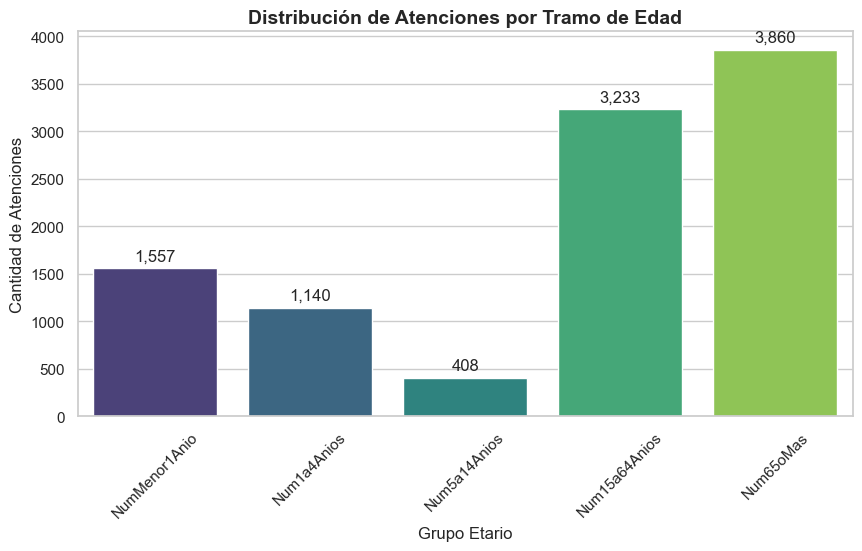

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))

# Gráfico corregido para evitar el Warning
ax = sns.barplot(
    x=resumen_edad.index, 
    y=resumen_edad.values, 
    hue=resumen_edad.index, # Asignamos hue para evitar el aviso
    palette="viridis", 
    legend=False            # Quitamos la leyenda redundante
)

plt.title("Distribución de Atenciones por Tramo de Edad", fontsize=14, fontweight='bold')
plt.ylabel("Cantidad de Atenciones")
plt.xlabel("Grupo Etario")
plt.xticks(rotation=45)

# Añadir etiquetas de valor sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()